In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
RawData =pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv")

#### The dataset has multiple medical indictors and diseases, your task is to create a descriptive analysis of data within the dataset.
    For example, you’re interested in investigating heart disease. 
        - Within the dataset, can you find any indicators that seem to influence the risk of heart disease? 
        - How do different states compare?
    For this dataset, you will need to use:
        - Data wrangling and cleaning
        - Renaming variables
        - Filtering data
        - Data aggregation 
        - Data Visualization techniques
        - Descriptive statistics 
        - Detailed descriptions of everything in your dataset – look up how to add markdown to your notebook
    My interest is in Diabeties and Heart Desease.

In [3]:
#Getting to know the data source.
RawData.shape

(101766, 50)

In [4]:
RawData.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
#Checking to see if the encounter_id is unique.
RawData['encounter_id'].is_unique

True

In [6]:
#Setting the index to encounter_id since I don't need 2 unique identifiers.
RawData = RawData.set_index('encounter_id')
RawData.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
#how many of those entries have useful data in the weight column?
#the weight is missing for alot of the entries.
RawData.groupby(['weight'])['patient_nbr'].count()

weight
>200             3
?            98569
[0-25)          48
[100-125)      625
[125-150)      145
[150-175)       35
[175-200)       11
[25-50)         97
[50-75)        897
[75-100)      1336
Name: patient_nbr, dtype: int64

In [8]:
#Checking the readmission Data.
#All entries seem to have data.
RawData.groupby(['readmitted'])['time_in_hospital'].count()

readmitted
<30    11357
>30    35545
NO     54864
Name: time_in_hospital, dtype: int64

In [9]:
#Checking data types on columns.
RawData.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

In [10]:
#Going to drop some of the columns that I don't think are going to help me.
drop_cols = ['patient_nbr','race','gender','age','weight','payer_code','medical_specialty','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','admission_type_id','discharge_disposition_id','admission_source_id']
RawData.drop(drop_cols, inplace = True, axis=1)

In [11]:
#Renaming the columns to something I understand.
RawData.rename(columns={'time_in_hospital': 'Hospital Stay', 'num_lab_procedures': 'Labs', 'num_procedures': 'Procedures', 'num_medications': 'Medications', 'number_outpatient': 'Outpatient Visits', 'number_emergency': 'ER Visits',  'number_inpatient': 'Inpatient Visits', 'diag_1': 'Primary Diagnosis', 'number_inpatient': 'Inpatient Visits', 'readmitted': 'Readmission'}, inplace=True)
RawData.head()

,Hospital Stay,Labs,Procedures,Medications,Outpatient Visits,ER Visits,Inpatient Visits,Primary Diagnosis,Readmission
encounter_id,,,,,,,,,
2278392,1,41,0,1,0,0,0,250.83,NO
149190,3,59,0,18,0,0,0,276,>30
64410,2,11,5,13,2,0,1,648,NO
500364,2,44,1,16,0,0,0,8,NO
16680,1,51,0,8,0,0,0,197,NO


In [12]:
#Verifing there are no non-standard missing Data in the Hospital stay.
RawData['Hospital Stay'] = pd.to_numeric(RawData['Hospital Stay'], errors='coerce')

In [13]:
RawData.dtypes

Hospital Stay         int64
Labs                  int64
Procedures            int64
Medications           int64
Outpatient Visits     int64
ER Visits             int64
Inpatient Visits      int64
Primary Diagnosis    object
Readmission          object
dtype: object

In [14]:
#Checking for null values.
RawData.isnull().sum()

Hospital Stay        0
Labs                 0
Procedures           0
Medications          0
Outpatient Visits    0
ER Visits            0
Inpatient Visits     0
Primary Diagnosis    0
Readmission          0
dtype: int64

In [15]:
#Making sure that I can get the average on the necessary columns.
RawData.mean()

Hospital Stay         4.395987
Labs                 43.095641
Procedures            1.339730
Medications          16.021844
Outpatient Visits     0.369357
ER Visits             0.197836
Inpatient Visits      0.635566
dtype: float64

### How does the average hospital stay compare between a patient with the primary diagnosis of diabeties versus heart desease.
    - I think that diabeties patients will have more in time hospital time than heart desease as primary diagnosis.

In [16]:
#pull out the entries with diabeties as the primary diagnosis.
RawDiabeticData = RawData[RawData['Primary Diagnosis'].str.contains('250')]
RawDiabeticData.head()

,Hospital Stay,Labs,Procedures,Medications,Outpatient Visits,ER Visits,Inpatient Visits,Primary Diagnosis,Readmission
encounter_id,,,,,,,,,
2278392,1,41,0,1,0,0,0,250.83,NO
28236,9,47,2,17,0,0,0,250.7,>30
590346,8,55,2,17,0,0,0,250.6,>30
630342,9,37,2,19,0,0,1,250.7,>30
676422,4,48,2,15,0,1,0,250.4,>30


In [17]:
#Checking to make sure I have just diabetic diagnosis.
RawDiabeticData.groupby(['Primary Diagnosis'])['Primary Diagnosis'].count()

Primary Diagnosis
250        235
250.01      61
250.02     675
250.03     201
250.1      313
250.11     625
250.12     417
250.13     851
250.2      114
250.21      12
250.22     156
250.23      29
250.3       20
250.31      15
250.32      17
250.33      19
250.4      267
250.41      91
250.42      90
250.43      25
250.5        8
250.51       1
250.52       4
250.53       4
250.6     1183
250.7      871
250.8     1680
250.81     186
250.82     412
250.83      95
250.9        7
250.91       4
250.92      52
250.93      17
Name: Primary Diagnosis, dtype: int64

In [18]:
#Adding column to add Genral Diagnosis or Diabetes to all entries.
RawDiabeticData['General Diagnosis'] = "Diabetes"
RawDiabeticData.count()

<ipython-input-18-5cdddeb57e20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RawDiabeticData['General Diagnosis'] = "Diabetes"


Hospital Stay        8757
Labs                 8757
Procedures           8757
Medications          8757
Outpatient Visits    8757
ER Visits            8757
Inpatient Visits     8757
Primary Diagnosis    8757
Readmission          8757
General Diagnosis    8757
dtype: int64

In [19]:
#There is multiple codes for Heart desease.
#Going to change Diagnosis code column to float so I can pull out a range of codes.
RawData['Primary Diagnosis'] = pd.to_numeric(RawData['Primary Diagnosis'], errors='coerce')
RawData.dtypes

Hospital Stay          int64
Labs                   int64
Procedures             int64
Medications            int64
Outpatient Visits      int64
ER Visits              int64
Inpatient Visits       int64
Primary Diagnosis    float64
Readmission           object
dtype: object

In [20]:
#pull out the entries with heart desease as the primary diagnosis.
RawHeartData = RawData[(RawData['Primary Diagnosis'] >=393) & (RawData['Primary Diagnosis']<=429.9)]
RawHeartData.head()

,Hospital Stay,Labs,Procedures,Medications,Outpatient Visits,ER Visits,Inpatient Visits,Primary Diagnosis,Readmission
encounter_id,,,,,,,,,
35754,3,31,6,16,0,0,0,414.0,>30
55842,4,70,1,21,0,0,0,414.0,NO
63768,5,73,0,12,0,0,0,428.0,>30
12522,13,68,2,28,0,0,0,398.0,NO
40926,7,60,0,15,0,1,0,428.0,<30


In [21]:
#Checking to make sure I have just heart desease diagnosis.
RawHeartData.groupby(['Primary Diagnosis'])['Hospital Stay'].count()

Primary Diagnosis
394.0      11
395.0       5
396.0      30
397.0       5
398.0     128
401.0     346
402.0     449
403.0     513
404.0     262
405.0       3
410.0    3614
411.0     254
412.0       1
413.0     117
414.0    6581
415.0     449
416.0      68
417.0       2
420.0      64
421.0      41
422.0       2
423.0      72
424.0     183
425.0      86
426.0     288
427.0    2766
428.0    6862
429.0      37
Name: Hospital Stay, dtype: int64

In [22]:
#Labling all entries on this list at Diabetes for General Diagnosis.
RawHeartData['General Diagnosis'] = "Heart Desease"
RawHeartData.count()

<ipython-input-22-fc0827a82d89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RawHeartData['General Diagnosis'] = "Heart Desease"


Hospital Stay        23239
Labs                 23239
Procedures           23239
Medications          23239
Outpatient Visits    23239
ER Visits            23239
Inpatient Visits     23239
Primary Diagnosis    23239
Readmission          23239
General Diagnosis    23239
dtype: int64

In [23]:
#Putting Diabetes and Heart Desease data into one dataframe.
CleanData = pd.concat([RawHeartData, RawDiabeticData])
CleanData.head()

,Hospital Stay,Labs,Procedures,Medications,Outpatient Visits,ER Visits,Inpatient Visits,Primary Diagnosis,Readmission,General Diagnosis
encounter_id,,,,,,,,,,
35754,3,31,6,16,0,0,0,414,>30,Heart Desease
55842,4,70,1,21,0,0,0,414,NO,Heart Desease
63768,5,73,0,12,0,0,0,428,>30,Heart Desease
12522,13,68,2,28,0,0,0,398,NO,Heart Desease
40926,7,60,0,15,0,1,0,428,<30,Heart Desease


<AxesSubplot:ylabel='Primary Diagnosis'>

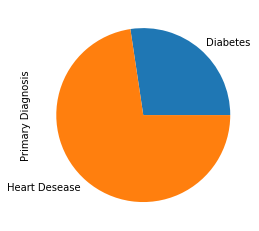

In [24]:
#How many entries in each diagnosis.
#Since there are so many more entries for Heart Desease I am going to stick with the adverages.
GeneralDiagnosisCount = CleanData.groupby(['General Diagnosis'])['Primary Diagnosis'].count()
GeneralDiagnosisCount.plot.pie()

,Hospital Stay
General Diagnosis,
Diabetes,4.342126
Heart Desease,4.184560


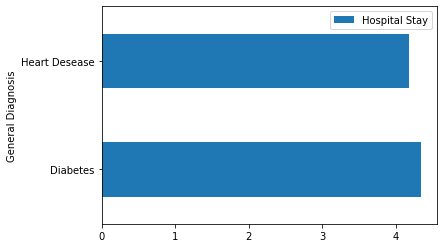

In [25]:
#Average hospital stay is slightly increase for Diabetes but not by much.
#The hospital stay seems about the same.
AvgHospitalStay = pd.pivot_table(CleanData,values="Hospital Stay",index="General Diagnosis",aggfunc=np.mean)
AvgHospitalStay.plot.barh()
AvgHospitalStay

<AxesSubplot:ylabel='General Diagnosis'>

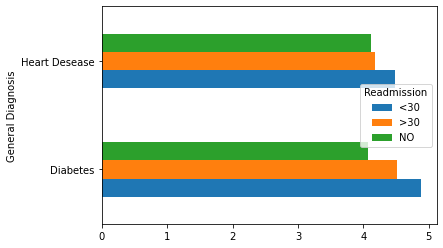

In [26]:
#Adding readmission information to shee if there is more of likely with Heart Desease.
#Looks likd the adverage is increased for Diabetes.
AvgHospitalStay = pd.pivot_table(CleanData,values="Hospital Stay",index="General Diagnosis",columns="Readmission",aggfunc=np.mean)
AvgHospitalStay.plot.barh()

<AxesSubplot:xlabel='Hospital Stay', ylabel='General Diagnosis'>

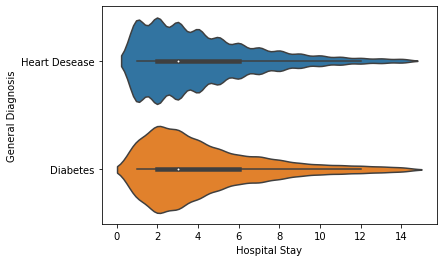

In [27]:
#How does the Diagnosis compare in total days hospital stay.
sns.violinplot(x="Hospital Stay",y="General Diagnosis",data=CleanData)

In [28]:
#I want to see if the adverage number of procedures show the same trend.
#Combining the procedures and the labs under 1 column.
CleanData['Total Procedures'] = CleanData['Procedures'] + CleanData['Labs']
drop_cols = ['Labs','Procedures']
CleanData.drop(drop_cols, inplace = True, axis=1)
CleanData.head()

,Hospital Stay,Medications,Outpatient Visits,ER Visits,Inpatient Visits,Primary Diagnosis,Readmission,General Diagnosis,Total Procedures
encounter_id,,,,,,,,,
35754,3,16,0,0,0,414,>30,Heart Desease,37
55842,4,21,0,0,0,414,NO,Heart Desease,71
63768,5,12,0,0,0,428,>30,Heart Desease,73
12522,13,28,0,0,0,398,NO,Heart Desease,70
40926,7,15,0,1,0,428,<30,Heart Desease,60


Readmission,<30,>30,NO
General Diagnosis,,,
Diabetes,46.627089,46.298674,46.471874
Heart Desease,47.144574,46.999174,46.334264


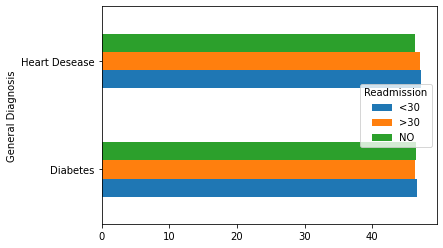

In [29]:
#It looks to be about the same for average number of procedures.
AvgProcedures = pd.pivot_table(CleanData,values="Total Procedures",index="General Diagnosis",columns="Readmission",aggfunc=np.mean)
AvgProcedures.plot.barh()
AvgProcedures

<AxesSubplot:xlabel='Total Procedures', ylabel='General Diagnosis'>

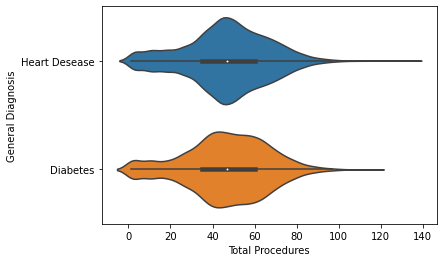

In [30]:
#How does the diagonsis compare in total procedures.
sns.violinplot(x="Total Procedures",y="General Diagnosis",data=CleanData)

In [31]:
#Going to see if what kind of differences we will see with emergency vs. non-emergency visits.
#Combining the procedures and the labs under 1 column.
CleanData['Non-Emergency Visits'] = CleanData['Outpatient Visits'] + CleanData['Inpatient Visits']
drop_cols = ['Outpatient Visits','Inpatient Visits']
CleanData.drop(drop_cols, inplace = True, axis=1)
CleanData.head()

,Hospital Stay,Medications,ER Visits,Primary Diagnosis,Readmission,General Diagnosis,Total Procedures,Non-Emergency Visits
encounter_id,,,,,,,,
35754,3,16,0,414,>30,Heart Desease,37,0
55842,4,21,0,414,NO,Heart Desease,71,0
63768,5,12,0,428,>30,Heart Desease,73,0
12522,13,28,0,398,NO,Heart Desease,70,0
40926,7,15,1,428,<30,Heart Desease,60,0


<AxesSubplot:ylabel='General Diagnosis'>

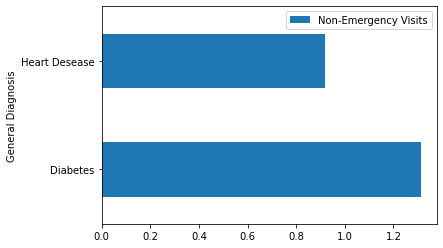

In [32]:
#Looks like there are less Non-Emergency visits when the diagnosis is fro Heart Desease on average.
AvgVisits = pd.pivot_table(CleanData,values="Non-Emergency Visits",index="General Diagnosis",aggfunc=np.mean)
AvgVisits.plot.barh()

<AxesSubplot:ylabel='General Diagnosis'>

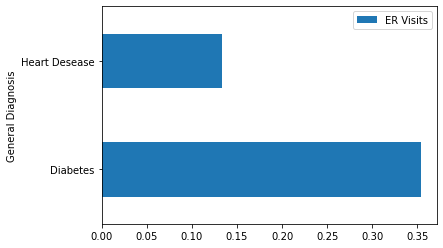

In [33]:
#It looks like the there are significant more ER visits for Diabetics.
AvgVisits = pd.pivot_table(CleanData,values="ER Visits",index="General Diagnosis",aggfunc=np.mean)
AvgVisits.plot.barh()

<AxesSubplot:ylabel='General Diagnosis'>

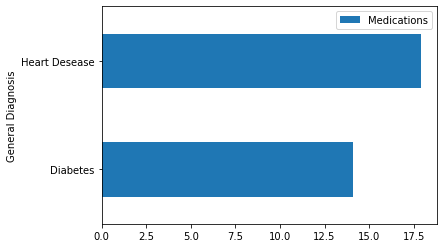

In [34]:
#There seem to be a more medications perscrided to Heart Desease Patients.
AvgMedications = pd.pivot_table(CleanData,values="Medications",index="General Diagnosis",aggfunc=np.mean)
AvgMedications.plot.barh()

<ipython-input-35-8ed6b8474f78>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  HospitalData = CleanData.groupby(['General Diagnosis'])['Hospital Stay','Total Procedures','Medications'].mean()
<ipython-input-35-8ed6b8474f78>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  VisitData = CleanData.groupby(['General Diagnosis'])['ER Visits','Non-Emergency Visits'].mean()


<AxesSubplot:ylabel='General Diagnosis'>

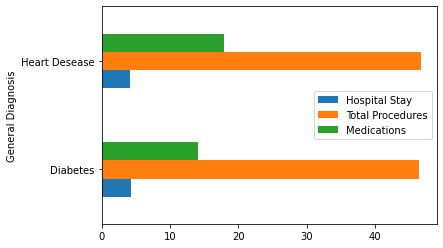

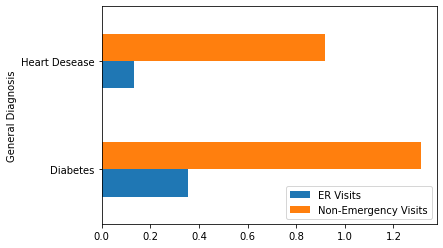

In [35]:
#Pretty sure I can put them together.
HospitalData = CleanData.groupby(['General Diagnosis'])['Hospital Stay','Total Procedures','Medications'].mean()
VisitData = CleanData.groupby(['General Diagnosis'])['ER Visits','Non-Emergency Visits'].mean()
HospitalData.plot.barh()
VisitData.plot.barh()

# So I was wrong. Time in the hospital for both diagnosis are about the same. Although there is a noticable differnce is the amount of medication perscribed. I expected that when it came to the non-emergency and ER visits Diabetics seem to have more on adverage then the Heart desease patients.